In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from hon import HON
from properties import *
from cluster_physics import *


In [5]:
Li_properties = Lithium()

In [10]:
T = 668

C_sat2 = Li_properties.solubility_tritium(T, correlation="Smith1979")
C_sat = np.exp(-6.558 +(6005/T))*ureg("1/atm^0.5")


In [11]:
C_sat2.to("atm^0.5")**-1

5.490035192223584 <Unit('1 / standard_atmosphere ** 0.5')>

In [12]:
C_sat2.to("atm**0.5")

c2 = 1/C_sat2.to("atm**0.5")

In [17]:
M = 6.941*ureg("g/mol")
density = Li_properties.density(T)
P = 1*ureg("atm")
c =C_sat/M*density
#c = c*1*ureg("atm")**0.5


In [14]:
M = 6.941*ureg("g/mol")
density = Li_properties.density(T)
P = 1*ureg("atm")
c2 =c2/M*density

In [15]:
c2.to("mole/meter**3/Pa**0.5")

1230.780972412218 <Unit('mole / meter ** 3 / pascal ** 0.5')>

In [18]:
c.to("mole/meter**3/Pa**0.5")


2550.3617125240876 <Unit('mole / meter ** 3 / pascal ** 0.5')>

In [19]:
import math

def calcular_presion_parcial_hidrogeno(fraccion_masica_h, masa_molar_h, masa_molar_li):
    # Convertir la fracción másica a fracción molar
    fraccion_molar_h = (fraccion_masica_h / masa_molar_h) / ((fraccion_masica_h / masa_molar_h) + ((1 - fraccion_masica_h) / masa_molar_li))
    # Presión total en atmósferas (ajustar si es diferente)
    presion_total = 1.0
    # Calcular la presión parcial del hidrógeno
    presion_parcial_h = (fraccion_molar_h * presion_total)*ureg("atm")
    return presion_parcial_h

def calcular_concentracion_equilibrio(solubilidad, presion_parcial_h):
    # Aplicar la ley de Sieverts
    concentracion_equilibrio = solubilidad * presion_parcial_h**0.5
    return concentracion_equilibrio.to("mol/m**3")

# Entrada de datos
solubilidad = c2
fraccion_masica_h = 0.00000001
masa_molar_h = 7.94  # g/mol
masa_molar_li = 6.94  # g/mol

# Calcular la presión parcial del hidrógeno
presion_parcial_h = calcular_presion_parcial_hidrogeno(fraccion_masica_h, masa_molar_h, masa_molar_li)
print(presion_parcial_h)
# Calcular la concentración de equilibrio
concentracion_equilibrio = calcular_concentracion_equilibrio(solubilidad, presion_parcial_h)

print(f"La concentración de equilibrio del hidrógeno en el litio es: {concentracion_equilibrio*masa_molar_h*ureg('g/mol')}")


8.74055416717954e-09 standard_atmosphere
La concentración de equilibrio del hidrógeno en el litio es: 290.82321183530956 gram / meter ** 3


In [21]:
concentracion_eq_g= concentracion_equilibrio/Li_properties.density(T).to('g/m**3')

ratio = concentracion_eq_g*masa_molar_li*ureg("g/mol")

real_frac = ratio/(1+ratio)
real_frac*100


0.05129313200875491 <Unit('dimensionless')>

In [44]:
radius = (20*1e-4)*ureg("centimeter")
density_target = 500*ureg("g/centimeter**3")

volum_target = 4/3*np.pi*radius**3
mass_T = volum_target*density_target*0.5
molar_mass = 3.1016*ureg("gram/mol")
moles_T = mass_T/molar_mass
atoms_T = moles_T*6.022e23
atoms_T*1.53
moles_T

2.7010512024673658e-06 <Unit('mole')>

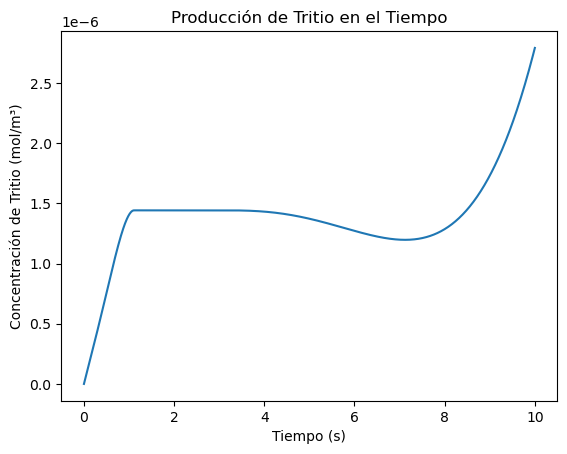

In [46]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del modelo
TBR = 1.53  # Tritium Breeding Ratio
masa_tritio_por_pulso = 8.377580409572781e-6  # g
masa_molar_tritio = 3.016  # g/mol
volumen_reactor = 1.0  # m³ (ajustar según el volumen real del reactor)
intervalo_pulso = 10.0  # segundos (ajustar según la frecuencia real de los pulsos)

# Convertir masa a moles y luego a concentración (mol/m³)
moles_tritio_por_pulso = masa_tritio_por_pulso / masa_molar_tritio
concentracion_inicial_por_pulso = moles_tritio_por_pulso / volumen_reactor

# Ecuación diferencial del modelo
def modelo_tritio(t, C):
    if int(t) % intervalo_pulso == 0:
        # Aumentar la concentración debido a la producción y disminuir por el consumo
        return (TBR - 1) * concentracion_inicial_por_pulso
    else:
        # No hay cambio en la concentración entre pulsos
        return 0

# Tiempo de simulación
t_span = (0, 10)  # De 0 a 10 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # 1000 puntos en el intervalo

# Resolviendo la ecuación diferencial
solucion = solve_ivp(modelo_tritio, t_span, [0], t_eval=t_eval)

# Graficando los resultados
plt.plot(solucion.t, solucion.y[0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración de Tritio (mol/m³)')
plt.title('Producción de Tritio en el Tiempo')
plt.show()


In [103]:
Fusion_power = 10*ureg("gigajoules")
DT_energy = 14.1*ureg("MeV")
DT_energy = DT_energy.to("gigajoule")
TBR = 1.53
molar_mass = 7.95*ureg("gram/mol")
number_fusions = Fusion_power/(0.5*DT_energy)
number_particles = number_fusions
number_particles_produced = number_fusions*TBR
number_moles_produced = number_particles_produced/6.022e23
number_moles_produced

6.196891455977723e+21 <Unit('dimensionless')>

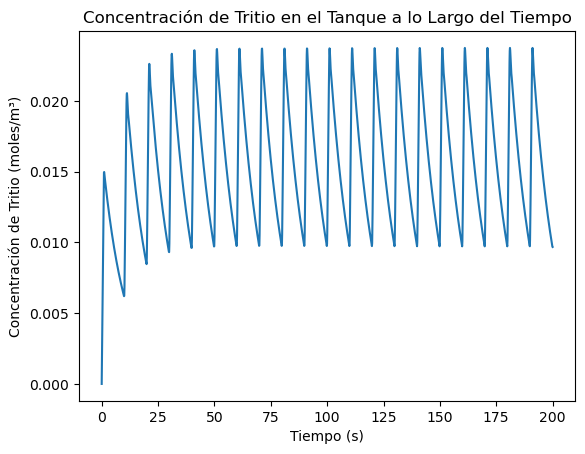

In [58]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del modelo
TBR = 1.53  # Tritium Breeding Ratio
neutrones_por_segundo = 6.196891455977724e+21  # Tasa de neutrones producidos por segundo
numero_de_Avogadro = 6.022e23
fraccion_recirculacion = 0.9  # Fracción del caudal de salida que se recircula
Q_out = 1  # Caudal de salida (m³/s)
V = 1  # Volumen del tanque (m³)
intervalo_pulso = 10.0  # Intervalo de tiempo entre pulsos (s)

# Tasa de producción de tritio en moles por segundo
tasa_produccion_T_mol_por_segundo = (TBR * neutrones_por_segundo) / numero_de_Avogadro

# Ecuación diferencial del modelo
def modelo_tanque(t, C):
    Q_in = fraccion_recirculacion * Q_out  # Caudal de entrada es una fracción del de salida
    C_in = C  # La concentración de entrada es igual a la de salida
    if int(t) % intervalo_pulso == 0:
        r = tasa_produccion_T_mol_por_segundo
    else:
        r = 0
    return (Q_in * C_in - Q_out * C) / V + r

# Tiempo de simulación
t_span = (0, 200)  # Simular por un periodo más largo para ver el efecto acumulativo
t_eval = np.linspace(t_span[0], t_span[1], 2000)

# Resolviendo la ecuación diferencial
solucion = solve_ivp(modelo_tanque, t_span, [0], t_eval=t_eval, method='RK45', max_step=1)

# Graficando los resultados
plt.plot(solucion.t, solucion.y[0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración de Tritio (moles/m³)')
plt.title('Concentración de Tritio en el Tanque a lo Largo del Tiempo')
plt.show()


In [50]:
TBR = 1.53
neutrons = 6.196891455977724e+21

atoms_T_s = TBR*neutrons 
T_mol_s = atoms_T/6.022e23

T_mol_s 

0.015744343951587376

In [22]:
1-1.6135826528805452e-08

0.9999999838641734

In [25]:
1.6135826528805452e-08/6.4900E-06

0.002486259865763552

In [ ]:
def mix_heat_fusion(fraction, deltaS1,deltaS2):
    deltaS = deltaS1*fraction + deltaS2*(1-fraction)
    return deltaS


In [95]:
# Define the data as a dictionary
data = {
    '1/T': [
        0.8194706994328922, 0.8385255198487712, 0.864461247637051,
        0.8840453686200378, 0.9105103969754254, 0.9369754253308129,
        0.964499054820416, 0.9973156899810964, 1.0269565217391305,
        1.0544801512287336, 1.0714177693761815, 1.087296786389414,
        1.0989413988657848
    ],
    'atomic_frac': [
        0.0015510844769528436, 0.0013503140378698763, 0.0011052951411260243,
        0.0009622271173675154, 0.0008248746552614606, 0.0006648787838417277,
        0.0005442343548300278, 0.00043196792973341824, 0.0003481817630688974,
        0.0002806470846309845, 0.0002519635929317021, 0.00022275429519995633,
        0.00020624397525140947
    ]
}
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
df.to_csv("cr_solubility.csv", index=False)


In [96]:
data = {
    '1/T': [
        0.8189413988657844, 0.8401134215500945, 0.8761058601134215,
        0.9105103969754254, 0.9369754253308129, 0.968733459357278,
        0.996257088846881, 1.0147826086956522, 1.0343667296786392,
        1.0613610586011344, 1.0835916824196599, 1.0989413988657848
    ],
    'atomic_frac': [
        0.0013925561288744663, 0.0011755310738783711, 0.000904735724234932,
        0.0007292496916841459, 0.0006061898993497584, 0.0004886109671160336,
        0.00039995090972036733, 0.00035358593665351865, 0.0003031135501567585,
        0.00024811260551377756, 0.0002094451143151473, 0.00019095738328781005
    ]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
df.to_csv("fe_solubility.csv", index=False)

In [97]:
# Your provided logarithmic data
log_data = {
    'X': [
        0.7, 0.7961065573770492, 0.8721311475409836,
        0.9653688524590164, 1.0815573770491804,
        1.1762295081967213, 1.210655737704918
    ],
    'logY': [
        -2.4154135338345863, -2.7158341550597807, -2.948262048564033,
        -3.2373582521878466, -3.5888543079009,
        -3.877973622581042, -3.9913102428201648
    ]
}

# Convert logY to Y by raising 10 to the power of each logY value
actual_y_values = [10**val for val in log_data['logY']]

# Creating a new dictionary for the DataFrame with the converted Y values
data = {
    '1/T': log_data['X'],
    'atomic_frac': actual_y_values
}

# Create a DataFrame from the dictionary with the converted Y values
df = pd.DataFrame(data)
df.to_csv("cr_solubility2.csv", index=False)

In [91]:
solubility_cr = pd.read_csv("cr_solubility.csv")
solubility_cr2 = pd.read_csv("cr_solubility2.csv")
solubility_fe = pd.read_csv("fe_solubility.csv")

In [92]:
from scipy.optimize import curve_fit
# Define a function for the type of equation you want to fit
# For example, a linear function would look like this:
def linear_func(x, a, b):
    return a * x + b

# Fit the data to the linear function
popt, pcov = curve_fit(linear_func, 1e-3*solubility_fe["1/T"], np.log10(solubility_fe["atomic_frac"]))

# Extract the parameters a and b
a, b = popt
print(f"a = {a}, b = {b}")

a = -3065.8540555759414, b = -0.3481327604472078


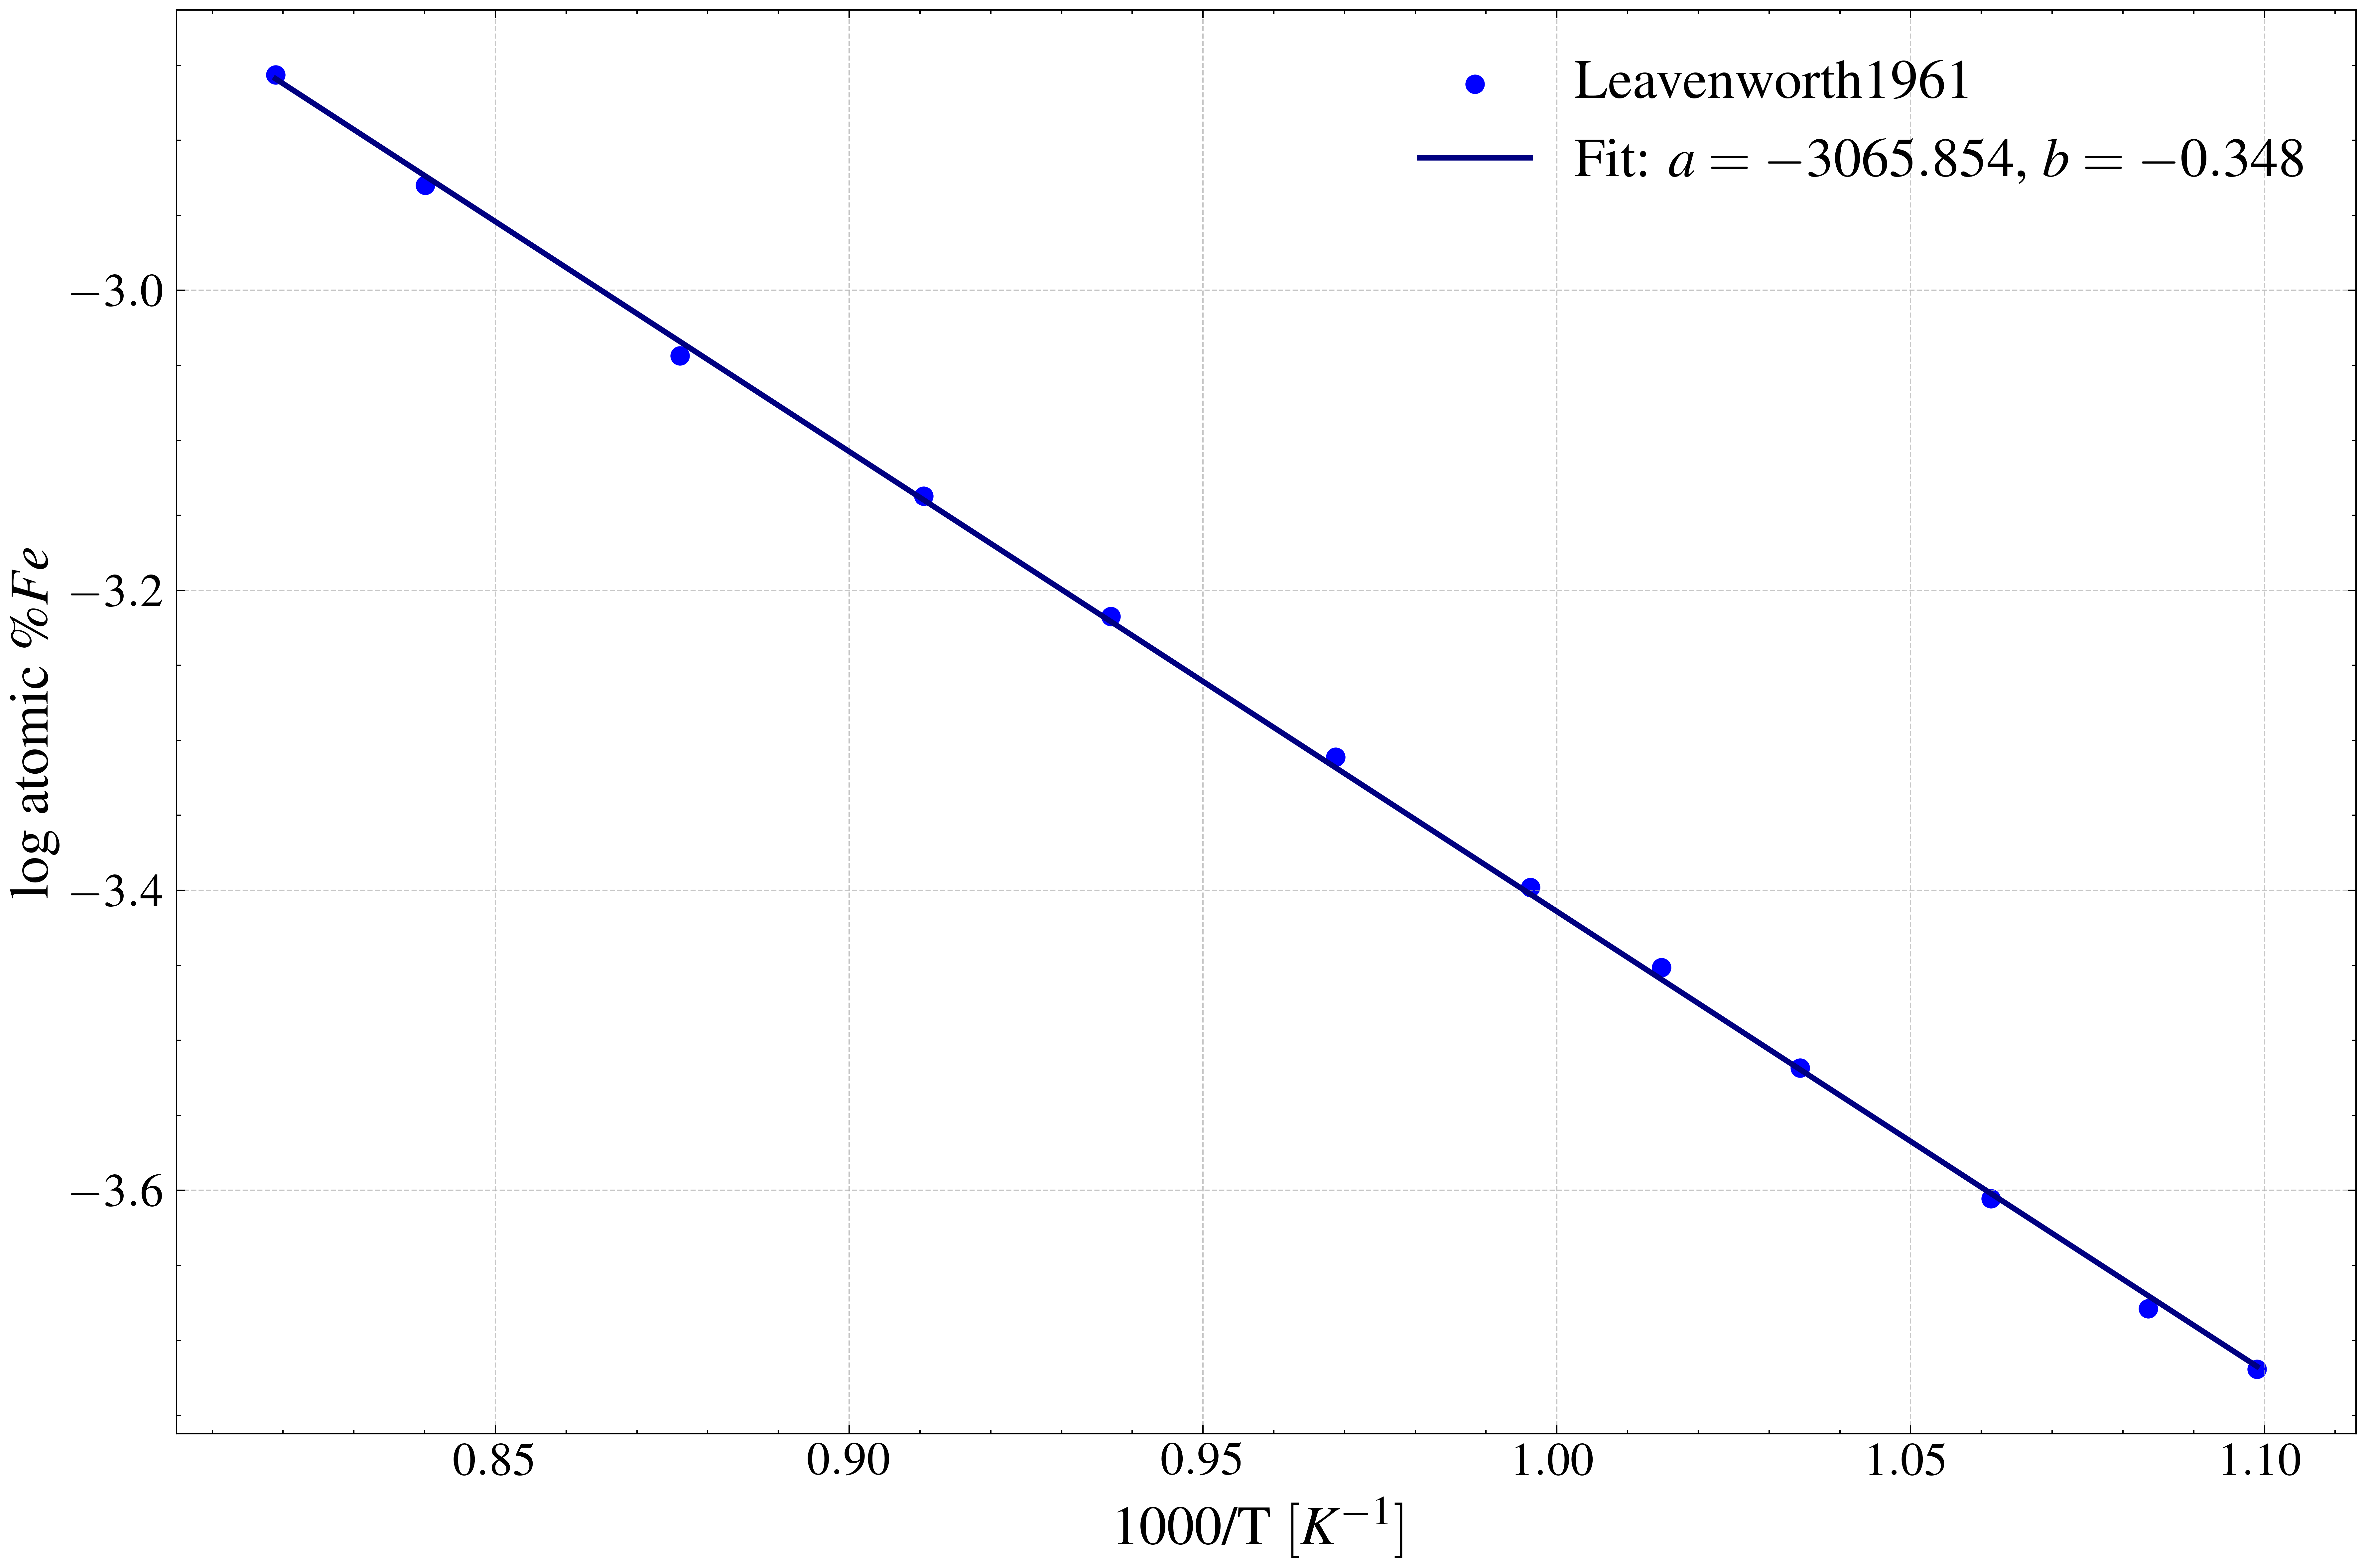

In [93]:
# T = np.linspace(800, 1200, 1000)
# plt.plot(solubility_cr["1/T"], solubility_cr["atomic_frac"])
# plt.plot(solubility_cr2["1/T"], solubility_cr2["atomic_frac"])
# plt.plot(1e3/T, np.exp(linear_func(1/T, a, b)))


# Plot the data and the fitted curve
plt.figure(figsize=(12, 8))
plt.scatter(solubility_fe["1/T"], np.log10(solubility_fe["atomic_frac"]), label='Leavenworth1961', color='blue')
plt.plot(solubility_fe["1/T"], (linear_func(1e-3*solubility_fe["1/T"], a, b)), color='navy', linewidth=2, label=f'Fit: $a={a:.3f}$, $b={b:.3f}$')


plt.xlabel(r'1000/T $[K^{-1}]$', fontsize=20)
plt.ylabel(r'log atomic $\% Fe$', fontsize=20)
#plt.yscale("log")
plt.legend(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize ticks and tick labels
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Show the plot
plt.tight_layout()

plt.show()

# Output the result
#print(f"The thickness at which the dose is equal to 2.98 µSv/h is: {thickness_threshold:.2f} cm")


In [90]:
# Chromium 
a = -7077.738953352149
b = -0.6140373196766337
T = 668
10**(linear_func(1e-3, a, b))



2.0334042501603255e-08

In [2]:
import scienceplots
plt.style.use(['science','ieee'])

In [159]:
a = -7077.738953352149
b = -0.6140373196766337

np.exp(linear_func(1/T, a, b))

1.3545516994234742e-05

In [47]:
def linear_func(x, a, b):
    return a * x + b
a = -7077.738953352149
b = -0.6140373196766337
sol_cr = np.exp(linear_func(1/T, a, b))

(1.6135826528805452e-08*1e2)/sol_cr

0.11912300236065704

In [ ]:
# Plot the data and the fitted curve
plt.figure(figsize=(12, 8))
plt.plot(solubility_fe["1/T"], (linear_func(1e-3*solubility_fe["1/T"], a, b)), color='navy', linewidth=2, label=f'Fit: $a={a:.3f}$, $b={b:.3f}$')


plt.xlabel(r'1000/T $[K^{-1}]$', fontsize=20)
plt.ylabel(r'log atomic $\% Fe$', fontsize=20)
#plt.yscale("log")
plt.legend(fontsize=20)
plt.grid(True, linestyle='--', alpha=0.7)

# Customize ticks and tick labels
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Show the plot
plt.tight_layout()

plt.show()


In [68]:
a = -7059.38984508694
b = -0.8016053051476358
T = 668
np.exp(linear_func(1/T, a, b))*1e-2

1.1541582494598285e-07

In [47]:
rho = 8200*ureg("kilogram/meter**3")
rho.to("gram/cm**3")

2842*7.95*1e-3	

22.5939

In [58]:
def sigma(Tm,T,Vm,deltaS):
    alpha = 0.71
    return alpha*deltaS*T/(cluster_physics.AVOGADRO*Vm**2)**(1/3)

Tm = 965.15*ureg("kelvin")
T = 668*ureg("kelvin")
Vm = 7.95*ureg("g/mol")/(8.2*ureg("g/cm**3"))
deltaS = (22.5939 * 1e3)*ureg("joules/mol")/ (965.15*ureg("kelvin"))
sigma(Tm,T,Vm,deltaS).to("joule/meter**2")

1.3421839569748284 <Unit('joule / meter ** 2')>

In [109]:
162*1e3/8.314

19485.205677171038

In [110]:
# LiH 

solubility = 0.0000000
fraction = 0.0000000
molar_mass = 51.9961*ureg("gram/mol")
density = 7.19*ureg("gram/cm**3")
melting_point = 2130*ureg("kelvin")
heat_fusion = 20.5*ureg("kilojoule/mol")
sigma = 0.5

# Ejemplo de uso de la clase
params = {
    'temperature': 668,
    'activation_energy': 19485.205677171038,
    'jump_distance': 1.17e-10,
    'molar_mass': 7.95,
    'mass_density': 8.2,
    'melting_point': 965.15,
    'heat_fusion': 22.5939 * 1e3,
    'supersaturation_ratio': 2.5,
    'sigma': 1.34, 
    'method': 'saturation'
}

cluster_physics = ClusterPhysics(params)

print(f"Critical radius: {cluster_physics.critical_radius()}")
print(f"Critical Gibbs free energy: {cluster_physics.critical_energy_barrier()}")
print(f"Critical number of atoms: {cluster_physics.critical_number_of_molecules()}")


Critical radius: 5.105749841305909e-10 meter
Critical Gibbs free energy: 1.4632295821774178e-18 joule
Critical number of atoms: 346.30984906163815 dimensionless


In [111]:
cluster_physics.diffusivity()

0.00042942796061395965 <Unit('meter ** 2 / second')>

In [ ]:
# LiC2 

solubility = 0.0000000
fraction = 0.0000000
molar_mass = 51.9961*ureg("gram/mol")
density = 7.19*ureg("gram/cm**3")
melting_point = 2130*ureg("kelvin")
heat_fusion = 63.5*ureg("kilojoule/mol")
sigma = 0.5

# Ejemplo de uso de la clase
params = {
    'temperature': 668,
    'activation_energy': 52920.2,
    'jump_distance': 4.6e-10,
    'molar_mass': 37.90,
    'mass_density': 1.3,
    'melting_point': 452+273.15,
    'heat_fusion': 64 * 1e3,
    'supersaturation_ratio': 20.5,
    'sigma': 0.4, 
    'method': 'melting'
}

cluster_physics = ClusterPhysics(params)

print(f"Critical radius: {cluster_physics.critical_radius()}")
print(f"Critical Gibbs free energy: {cluster_physics.critical_energy_barrier()}")
print(f"Critical number of atoms: {cluster_physics.critical_number_of_molecules()}")


In [106]:
# Li2O 

# Ejemplo de uso de la clase
params = {
    'temperature': 668,
    'activation_energy': 52920.2,
    'jump_distance': 4.6e-10,
    'molar_mass': 28.88,
    'mass_density': 2.1,
    'melting_point': 1438+273.15,
    'heat_fusion': 58.576 * 1e3,
    'supersaturation_ratio': 2.5,
    'sigma': 0.37, 
    'method': 'saturation'
}

cluster_physics = ClusterPhysics(params)

print(f"Critical radius: {cluster_physics.critical_radius()}")
print(f"Critical Gibbs free energy: {cluster_physics.critical_energy_barrier()}")
print(f"Critical number of atoms: {cluster_physics.critical_number_of_molecules()}")


Critical radius: 1.9997747298320565e-09 meter
Critical Gibbs free energy: 6.198013039713763e-18 joule
Critical number of atoms: 1466.9146840725102 dimensionless


In [37]:
# M = 7.95  # Molar mass of LiH in g/mol
# LiH_rho = 0.780  # g/cm3
# volumen_molar = M/LiH_rho
# volumen_atom = volumen_molar/6.02214076e23
# print(C_sat)
# print(M/LiH_rho)
# print(volumen_atom)

# Ejemplo de uso de la clase
params = {
    'temperature': 750,
    'activation_energy': 52920.2,
    'jump_distance': 4.6e-10,
    'molar_mass': 150.05,
    'mass_density': 2.5,
    'melting_point': 1300,
    'heat_fusion': 52 * 1e3,
    'sigma': 0.15, 
}

T = 668
P0 = 1.01325e5
M = 150.05
rho = 2.5
volumen_molar = M/rho*1e-6
volumen_atom = volumen_molar/6.02214076e23
print(volumen_molar)
print(volumen_atom)

C_sat = Li_properties.solubility_tritium(T, correlation="Smith1979").magnitude
C_sat *= 133.322**0.5 #to Pa**0.5
C_sat *= 7.941 #to g
C_sat *= 1/Li_properties.density(T) #to cm3 Li
C_sat *= 1e-6
#C_satk /= (6.02214076*1e23)
S = 10.0
C_sat = 1/C_sat.magnitude
print(C_sat)

input_params = {
    "model": "classic",
    "species_atom_volume": volumen_atom,  # in m**3
    "surface_tension": 0.15,       # in N/m
    "solubility": C_sat,           # in mol/m**3/Pa
    "pressure": P0,                # in Pa
    "supersaturation_ratio": S,          # ratio of C/C_sat
    "diffusivity": 1e-4,          # in m**2/s
    "EoS": "ideal_gas"
}

c_type = "some_type"
time = "some_time"

hytrans = HON(input_params, c_type, time)

S = hytrans.S_HON(T, M)
print("Nucleation rate:", S)
print("Gibbs free energy:", hytrans.Dgvol)
print("Critical radius:", hytrans.r_c)
print("Critical number of atoms:", hytrans.n_c)
print("Critical Gibbs free energy:", hytrans.DG_c.to("joules"))


6.002e-05
9.966555481177427e-29
1075.791781026455
Nucleation rate: 0.0 / meter ** 3 / second
Gibbs free energy: -2.1235379182309032e-20 joule
Critical radius: 1.4080118931166237e-09 meter
Critical number of atoms: 117.31325272323035 dimensionless
Critical Gibbs free energy: 1.245639910796345e-18 joule


(-100.0, 150.0)

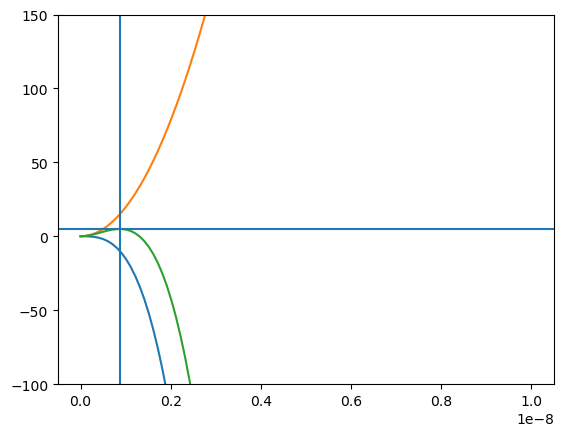

In [16]:
r = np.linspace(0.001*1e-10,1*1e-8,100)

plt.plot(r, (4/3)*np.pi*r**3*hytrans.Dgvol*6.242*1e18)
plt.plot(r, 4 * np.pi * r**2 * hytrans.surface_tension.magnitude*6.242*1e18)
plt.plot(r, ((4/3)*np.pi*r**3*hytrans.Dgvol.magnitude+ 4 * np.pi * r**2 * hytrans.surface_tension.magnitude)*6.242*1e18)
plt.axvline(hytrans.r_c.magnitude)
plt.axhline( hytrans.DG_c.to("joules").magnitude*6.242*1e18)
#plt.xlim(0,1*1e-9)
plt.ylim(-100,150)


In [1]:
from cluster_physics import *
import cluster
from cluster_sim import ClusterSimulation
import matplotlib.pyplot as plt

In [2]:
# Ejemplo de uso de la clase
params = {
    'temperature': 750,
    'activation_energy': 52920.2,
    'jump_distance': 4.6e-10,
    'molar_mass': 150.05,
    'mass_density': 2.5,
    'melting_point': 1300,
    'heat_fusion': 52 * 1e3,
    'supersaturation_ratio': 20.5,
    'sigma': 0.15, 
    'method': 'melting'
}

cluster_physics = ClusterPhysics(params)

In [3]:
cluster_physics.critical_number_of_molecules()

23.04237422754489 <Unit('dimensionless')>

1.053546026072275e-09


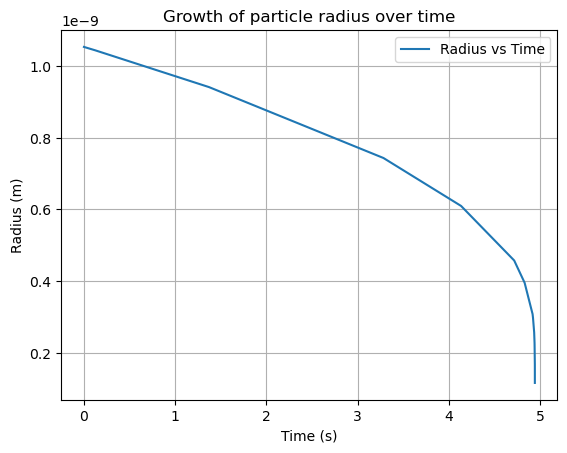

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from extensisq import BS5, SSV2stab, Pr9

# Initial conditions
r_0 = cluster_physics.critical_radius().magnitude  # Initial radius, m
print(r_0)
# Time span for the integration
t_span = (0, 3600)  # e.g., 1 hour

# Solve the differential equation using solve_ivp
sol = solve_ivp(
    cluster_physics.dr_dt, 
    t_span, 
    [r_0], 
    #args=(D, lambda_, V, k_B, T, sigma_a, S),
    method = SSV2stab,
    rtol=1e-10,
    atol=1e-10,

    #dense_output=True
)

# Plotting the solution
plt.plot(sol.t, sol.y[0], label='Radius vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Radius (m)')
plt.title('Growth of particle radius over time')
plt.legend()

plt.grid(True)
plt.show()


In [5]:
cluster_physics.print_properties()

Constante de Boltzmann: 1.3806e-23 joule / kelvin
Constante de los gases: 8.314 joule / kelvin / mole
Temperatura: 750 kelvin
Energía de activación: 52920.2 kelvin
Distancia de salto: 4.6e-10 meter
Masa molar: 150.05 gram / mole
Densidad: 2.5 gram / centimeter ** 3
Punto de fusión: 1300 kelvin
Calor de fusión: 52000.0 joule / mole
Entropía de fusión: 40.0 joule / kelvin / mole
Volumen molar: 6.002000000000001e-05 meter ** 3 / mole
Volumen molecular: 9.966555249479468e-29 meter ** 3
Sigma: 0.15 joule / meter ** 2


/home/alexandre_sureda/miniconda3/envs/neutronics/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


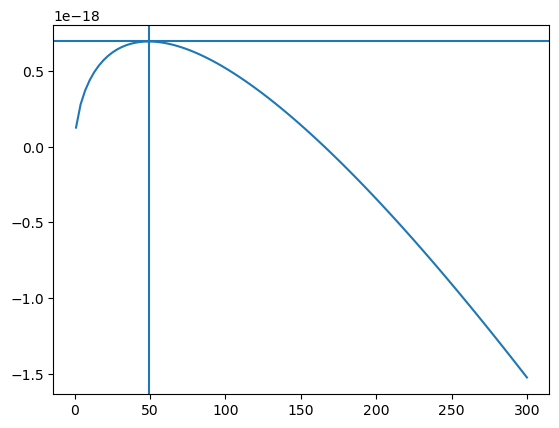

In [15]:
import matplotlib.pyplot as plt
plt.figure()
n = np.linspace(1,300,100)
plt.plot(n,cluster_physics.total_free_energy(n))
plt.axvline(cluster_physics.critical_number_of_molecules())
plt.axhline(cluster_physics.critical_energy_barrier().magnitude)


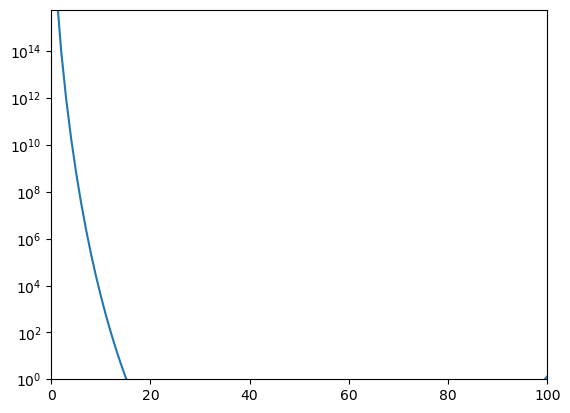

In [16]:
import matplotlib.pyplot as plt
plt.figure()
n = np.linspace(1,100,100)
plt.plot(n,1e-6*cluster_physics.number_density_equilibrium(n))
#plt.axvline(cluster_physics.critical_number_of_molecules_saturation())
#plt.axvline(cluster_physics.critical_number_of_molecules_melting())
plt.xlim(0,100)
plt.ylim(1,6e15)
plt.yscale("log")
#plt.axhline(cluster_physics.critical_energy_barrier_saturation().magnitude)
#plt.axhline(cluster_physics.critical_energy_barrier_melting().magnitude)

In [2]:
rho = 0.515-1.01e-4*((650-273.15)-200)

In [28]:
# Ejemplo de valores
ppm = 1  # 100 ppm
masa_molar_soluto = 56.0  # Masa molar del soluto en g/mol (ejemplo: NaCl)
masa_molar_solvente = 6.98  # Masa molar del solvente en g/mol (ejemplo: agua)

# Convertir ppm a fracción en peso
fraccion_peso = ppm / 1e6

# Calcular la fracción molar
fraccion_molar = (fraccion_peso * masa_molar_solvente) / (masa_molar_soluto + fraccion_peso * (masa_molar_solvente - masa_molar_soluto))

print("Fracción Molar:", 1 -fraccion_molar)

Fracción Molar: 0.9999998753570337


In [16]:
# input
M_Li=349015.42 # kg Li mass in the entire circuit 
M_Li_discharge= 142614.66 # kg  in 1 pulse
Density_Li= 497.1385 # kg/m3
Molar_mass_Li= 6.941 # g/mol
V_Li_discharge= M_Li_discharge/Density_Li # m3 
Pulse_period=90 # s
M_impurities= 135000 # kg Mass of impurities produced in 1 year of operation 
Operation_time= 8000*3600 # s in 1 year 
X_Fe=0.8 # M_Fe/M_total_impurities
X_Cr=0.1 
X_AlN=0.1

In [17]:

Number_of_pulses=  Operation_time/Pulse_period # number of pulses in 1 year of operation 
M_impurities_per_period=M_impurities/Number_of_pulses # Impurities mass produce in 1 period 

print("number of pulses in 1 year of operation: ",Number_of_pulses)
print("Impurities mass produced in 1 period in the entire circuit : ",M_impurities_per_period," kg" )


number of pulses in 1 year of operation:  320000.0
Impurities mass produced in 1 period in the entire circuit :  0.421875  kg


In [18]:
MM_Fe= 55.845*1e-3 # kg/mol molar mass Fe 
MM_Cr= 51.996*1e-3
MM_AlN= 40.988*1e-3

In [24]:
M_Fe=M_impurities_per_period*X_Fe
M_Cr=M_impurities_per_period*X_Cr
M_AlN=M_impurities_per_period*X_AlN
mol_Li = (M_Li_discharge - M_impurities_per_period)/Molar_mass_Li # mol
mol_Fe=M_Fe/MM_Fe
mol_Cr=M_Cr/MM_Cr
mol_AlN=M_AlN/MM_AlN
C_Fe=M_Fe/V_Li_discharge # kg/m3
C_Cr=M_Cr/V_Li_discharge
C_AlN=M_AlN/V_Li_discharge


print("Fe_ratio mol/mol", mol_Fe/(mol_Fe+mol_Li+mol_Cr+mol_AlN),"Fe concentration: ", C_Fe,"kg/m3 ;",C_Fe/MM_Fe,"mol/m3")
print("Cr ratio mol/mol: ", mol_Cr/(mol_Fe+mol_Li+mol_Cr+mol_AlN),"Cr concentration: ",C_Cr, "kg/m3 ;", C_Cr/MM_Cr,"mol/m3")
print("AlN ratio mol/mol: ", mol_AlN/(mol_Fe+mol_Li+mol_Cr+mol_AlN),"AlN concentration: ",C_AlN, "kg/m3 ;",C_AlN/MM_AlN,"mol/m3")


Fe_ratio mol/mol 0.0002940234877874016 Fe concentration:  0.0011764866511619493 kg/m3 ; 0.021067000647541398 mol/m3
Cr ratio mol/mol:  3.947356930217575e-05 Cr concentration:  0.00014706083139524366 kg/m3 ; 0.002828310473791131 mol/m3
AlN ratio mol/mol:  5.007484408695057e-05 AlN concentration:  0.00014706083139524366 kg/m3 ; 0.00358789966320005 mol/m3


In [8]:
print("number of pulses in 1 year of operation (pilot plant): ",Number_of_pulses)
print("Impurities mass produced in 1 period in the entire circuit : ",M_impurities_per_period," kg" )

print("Fe concentration: ", C_Fe,"kg/m3 ;",C_Fe/MM_Fe,"mol/m3")
print("Cr concentration: ", C_Cr,"kg/m3 ;", C_Cr/MM_Cr,"mol/m3")
print("AlN concentration: ", C_AlN,"kg/m3 ;",C_AlN/MM_AlN,"mol/m3")

number of pulses in 1 year of operation (pilot plant):  320000.0
Impurities mass produced in 1 period in the entire circuit :  0.421875  kg
Fe concentration:  0.0011764866511619493 kg/m3 ; 0.021067000647541398 mol/m3
Cr concentration:  0.00014706083139524366 kg/m3 ; 0.002828310473791131 mol/m3
AlN concentration:  0.00014706083139524366 kg/m3 ; 0.00358789966320005 mol/m3


In [3]:
AVOGADRO = 6.022141e23
BOLTZMANN = 1.3806e-23
TEMP_INDEP_DIFFUSIVITY = 2e9
ACTIVATION_ENERGY = 4.4e5
JUMP_DISTANCE = 4.6*1e-10
CONSTANT_GAS = 8.314
import numpy as np
print('diffusivity', TEMP_INDEP_DIFFUSIVITY * np.exp(-ACTIVATION_ENERGY/(CONSTANT_GAS*750)))


diffusivity 4.524817574332084e-22


In [4]:
MAX_NUMBER_MOLECULES = 60
number_clusters_start = 9
dt = 1e-8/cluster_physics.unbiased_jump_rate().magnitude
dt = dt*1e4
time_steps = int(1e5)
T=750

In [5]:
#time_step_array = [int(1e5), int(2e5), int(3e5), int(4e5), int(5e5)]
time_step_array = [int(1e3), int(1e5)]

x_array = []
y_array = []
for ts in time_step_array:
    sim = ClusterSimulation(params,ts,dt, number_clusters_start, MAX_NUMBER_MOLECULES)
    sim.simulate()
    x = sim.number_molecules_as_array()
    y = sim.number_clusters_as_array()
    x_array.append(x)
    y_array.append(y)

time 0 accumulated_time 0.007767278410074667
n cluster with 1 molecule 6.0221409e+23
n cluster with 2 molecules 8.171181785040266e+16
n cluster with 23 molecules 3.9605314974504014e-32
n cluster with 40 molecules 7.86724462036667e-72
time 50 accumulated_time 0.3961311989138082
n cluster with 1 molecule 6.0221409e+23
n cluster with 2 molecules 2.4347577048381967e+18
n cluster with 23 molecules 6.418162355161427e-18
n cluster with 40 molecules 3.3559010623789794e-49
time 100 accumulated_time 0.7844951194175405
n cluster with 1 molecule 6.0221409e+23
n cluster with 2 molecules 4.31118725838593e+18
n cluster with 23 molecules 5.809345584414318e-14
n cluster with 40 molecules 1.8512484839962504e-41
time 150 accumulated_time 1.172859039921272
n cluster with 1 molecule 6.0221409e+23
n cluster with 2 molecules 5.808919370569314e+18
n cluster with 23 molecules 1.3809390167131767e-11
n cluster with 40 molecules 1.2902986775433324e-36
time 200 accumulated_time 1.5612229604250034
n cluster with 1 

In [22]:

def dg(number_of_molecules):
    return cluster_physics.bulk_free_energy() * number_of_molecules + cluster_physics.surface_free_energy() * number_of_molecules ** (2/3)
def eq(number_of_molecules):
    return cluster_physics.AVOGADRO * np.exp(-dg(number_of_molecules) / (ClusterPhysics.BOLTZMANN * cluster_physics.temperature))

/home/alexandre_sureda/miniconda3/envs/neutronics/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


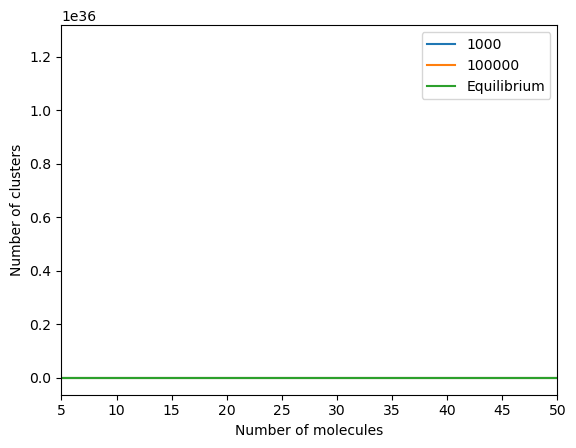

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
n = np.linspace(2, 100, 100)
for i in range(len(time_step_array)):
    y_values = np.array(y_array[i])  # Convert to NumPy array
    plt.plot(x_array[i], y_values , label=str(time_step_array[i]))
plt.plot(n, eq(n), label='Equilibrium')
    
plt.legend()
plt.xlabel("Number of molecules")
plt.ylabel("Number of clusters")
plt.xlim(5, 50)
#plt.ylim(-50, -20)
plt.show()

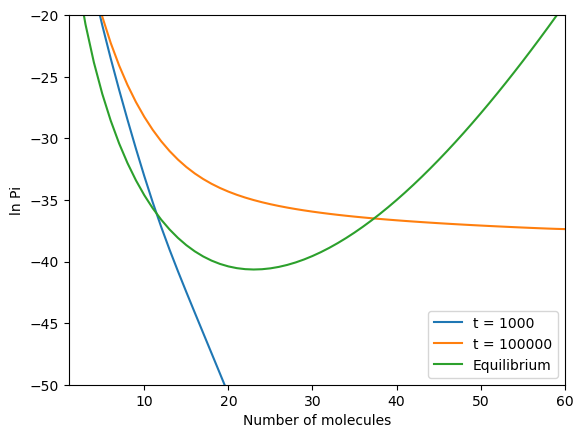

In [35]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
n = np.linspace(1, 100, 100)
for i in range(len(time_step_array)):
    y_values = np.array(y_array[i])  # Convert to NumPy array
    plt.plot(x_array[i], np.log(y_values / cluster_physics.AVOGADRO.magnitude), label="t = " + str(time_step_array[i]))

plt.plot(n, np.log(eq(n).magnitude/cluster_physics.AVOGADRO.magnitude), label='Equilibrium')

plt.legend()
plt.xlabel("Number of molecules")
plt.ylabel("ln Pi")
plt.xlim(1, 60)
plt.ylim(-50, -20)
plt.show()

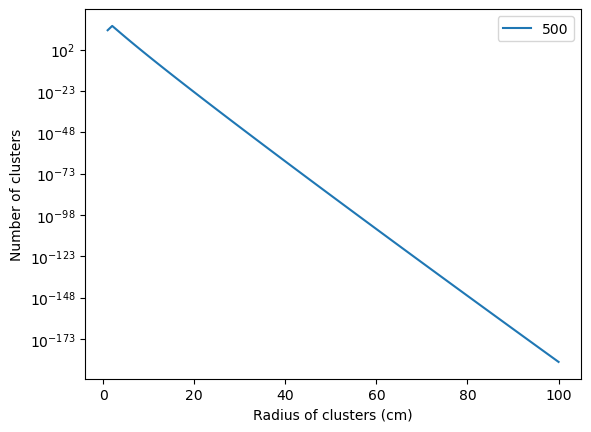

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
for i in range(len(time_step_array)):
    # Convert the keys of the dictionary to a list
    x_values = np.array(list(x_array[i]))
    y_values = np.array(list(y_array[i]))
    radius = ((3 / (4 * np.pi)) * x_values * 4.485 * 1e-23) ** (1/3)
    plt.semilogy(x_values, y_values, label=str(time_step_array[i]))

plt.legend()
plt.xlabel("Radius of clusters (cm)")
plt.ylabel("Number of clusters")
plt.show()
